In [1]:
from sympy import *
import numpy as np
import IPython
from PIL import Image
from matplotlib.pyplot import imshow, show
init_printing()

In [5]:
def to_matrix(text):
    text = text.replace('−', '-')
    mat = []
    text.splitlines
    for row in text.splitlines():
        if not row:
            continue
        mat.append([])
        for col in row.split():
            if col.strip('-').isdigit():
                mat[-1].append(int(col))
            else:
                mat[-1].append(symbols(col))
    return Matrix(mat)


In [14]:
# 9

M = Matrix([[x**2 - 1,  ],
            [],
            []])

In [4]:
from sympy.abc import x, y, z

u = x**2*y + z**2*x + y**2*z - z**2*y - y**2*x - x**2*z
u1 = x**2*y + z**2*x - z**2*y  - x**2*z + y**2*(z - x)
u4 = (x-z)*(x*z + x*y + y*z - y**2)
u1.subs({x: 2, y:6, z:3})

12

In [12]:
    
k = 23
M = np.zeros((k,k), dtype=np.int8)
for i in range(k):
    for j in range(k):
        M[i, j] = max(i+1, j+1)

M
Matrix(M).det()


In [44]:
def line_to_matrix(line, func=None):
    matrix = np.array(list(line), dtype=int).reshape(int(len(line)**0.5), -1)
    # Если передана функция применяем ко всем элементам матрицы
    if func is not None:
        matrix = func(matrix)
        print(matrix)
    return matrix


def line_det(line, func=None):
    return np.linalg.det(line_to_matrix(line, func))

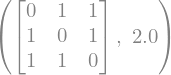

In [53]:
rang = 3
length = rang ** 2
mat = None
max_det = float('-inf')
for i in range(2**length):
    line = bin(i)[2:].zfill(length)
    if (det := line_det(line)) > max_det:
        max_det = det
        mat = line_to_matrix(line)

Matrix(mat), max_det

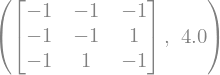

In [54]:
rang = 3
length = rang ** 2
mat = None
max_det = float('-inf')
for i in range(2**length):
    line = bin(i)[2:].zfill(length)
    if (det := line_det(line, lambda x: x*2-1)) > max_det:
        max_det = det
        mat = line_to_matrix(line, lambda x: x*2-1)

Matrix(mat), max_det

In [34]:
def print_as_line(num, length):
    print(bin(num)[2:].zfill(length))

def lines_gen(length=6):
    lines = []
    for i in range(2**length):
        for l in lines:
            if i ^ l == 2**(length)-1:
                # print_as_line(i, length)
                # print_as_line(l, length)
                # print_as_line(i^l, length)
                # print_as_line(2**(length)-1, length)
                # print()
                break
        else:
            lines.append(i)
    return lines

l = 3
# for line in lines_gen(l):
#     print_as_line(line, l)
len(lines_gen(l))

# p = 1
# for i in range(27, 33):
#     p *= i
# p

In [104]:
M = np.arange(1, 21).reshape((4, -1))
# M = Matrix(4, 5, range(1, 21))
M

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20]])

In [106]:


def get_minor(matrix, y, x):
    if isinstance(x, int):
        x = [x]
    if isinstance(y, int):
        y = [y]
    m = np.array(matrix)
    height, width = m.shape
    assert width - len(x) == height - len(y), 'Не квадратная матрица'
    rows = np.expand_dims(sorted(set(range(height)) - set(y)), 1)
    columns = sorted(set(range(width)) - set(x))
    M
    # return M[np.repeat(rows, len(columns), 1), columns]
    return np.linalg.det(m[np.repeat(rows, len(columns), 1), columns])


In [107]:
get_minor(M, [0, 1], [0, 1, 2])